Manual Calculation:
Slope (m): 0.0602
Intercept (c): 6.8500
R² (Manual): 0.8403


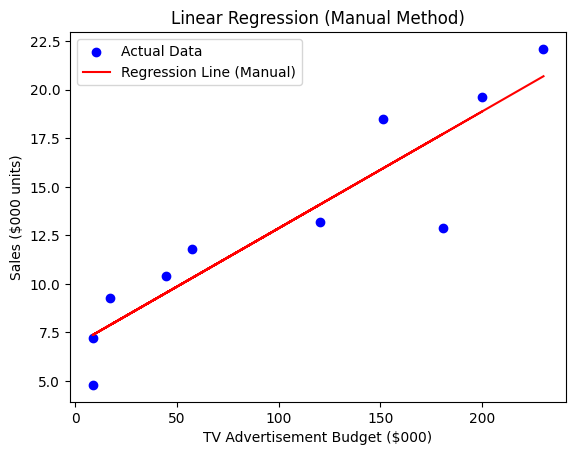


Scikit-learn Model:
Slope (m): 0.0602
Intercept (c): 6.8500
R² (Model): 0.8403


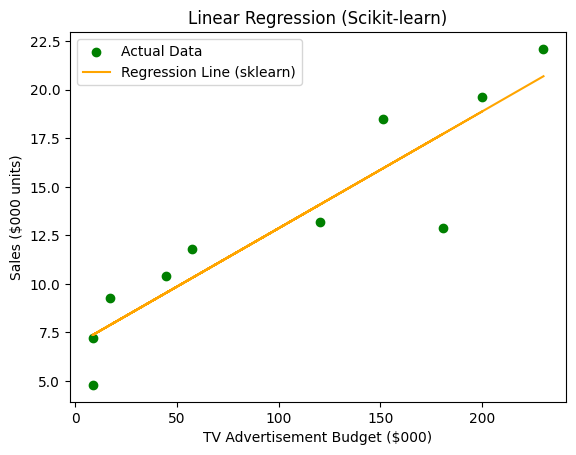

In [1]:
# --------------------------
# Ex No: 8 - Linear Regression
# --------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 19.6]
}
df = pd.DataFrame(data)

# --------------------------
# 1. User-Defined Least Squares
# --------------------------
X = df['TV'].values
Y = df['Sales'].values
n = len(X)

sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X ** 2)

# slope (m) and intercept (c)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
c = (sum_y - m * sum_x) / n

print("Manual Calculation:")
print(f"Slope (m): {m:.4f}")
print(f"Intercept (c): {c:.4f}")

# Predictions
Y_pred = m * X + c

# R² calculation
SS_res = np.sum((Y - Y_pred) ** 2)
SS_tot = np.sum((Y - np.mean(Y)) ** 2)
R2_manual = 1 - (SS_res / SS_tot)
print(f"R² (Manual): {R2_manual:.4f}")

# Visualization
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line (Manual)')
plt.xlabel('TV Advertisement Budget ($000)')
plt.ylabel('Sales ($000 units)')
plt.title('Linear Regression (Manual Method)')
plt.legend()
plt.show()

# --------------------------
# 2. Scikit-learn Linear Regression
# --------------------------
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, Y)

print("\nScikit-learn Model:")
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (c): {model.intercept_:.4f}")
print(f"R² (Model): {model.score(X_reshaped, Y):.4f}")

# Visualization
plt.scatter(X, Y, color='green', label='Actual Data')
plt.plot(X, model.predict(X_reshaped), color='orange', label='Regression Line (sklearn)')
plt.xlabel('TV Advertisement Budget ($000)')
plt.ylabel('Sales ($000 units)')
plt.title('Linear Regression (Scikit-learn)')
plt.legend()
plt.show()
